<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
1. Algoritma KNN adalah singkatan dari K-Nearest Neaighbour yang mana K adalah jumlah tetangga. Algoritma ini bekerja dengan cara menghitung Eucledian Distance antara data yang akan diprediksi dengan tetangganya sejumlah K dan akan melakukan klasifikasi data kedalam jumlah K terbanyak
2. - Sensitif terhadap data pencilan
   - Jika jumlah K sama maka algoritma akan bingung dan akan menentukan klasifikasi secara random

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_uniform_score=[]
list_distance_score=[]
for i in range(2, 21):
    clf_uniform=KNeighborsClassifier(n_neighbors=i, weights='uniform')
    clf_distance=KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf_uniform.fit(X_train, y_train)
    clf_distance.fit(X_train, y_train)
    y_pred_uniform=clf_uniform.predict(X_test)
    y_pred_distance=clf_distance.predict(X_test)
    acuracy_uniform=accuracy_score(y_test, y_pred_uniform)
    acuracy_distance=accuracy_score(y_test, y_pred_distance)
    list_uniform_score.append(acuracy_uniform)
    list_distance_score.append(acuracy_distance)
print("Uniform Scores:")
display(list_uniform_score)
print("Distance Scores:")
display(list_distance_score)

Uniform Scores:


[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance Scores:


[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

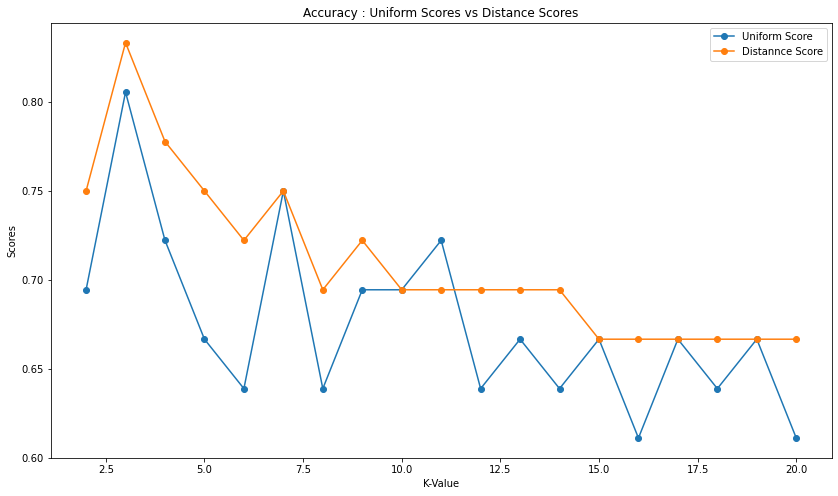

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
data_x = np.arange(2,21)
data_y1 = list_uniform_score
data_y2 = list_distance_score
ax.plot(data_x, data_y1, marker='o', label='Uniform Score')
ax.plot(data_x, data_y2, marker='o', label='Distannce Score')
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy : Uniform Scores vs Distance Scores')
plt.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [40]:
import numpy as np

rng = np.random.RandomState(1)

ox = 10 * rng.rand(50, 4)
oy = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_lr2 = LinearRegression(fit_intercept=True)

In [42]:
model_lr2.fit(ox, oy)

LinearRegression()

In [29]:
y_prdict = model_lr2.predict(X)

In [39]:
model_lr2.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [31]:
model_lr2.intercept_

0.5000000016247981